In [4]:
from astroquery.sdss import SDSS
from astropy import coordinates as coords
from astropy import units as u
from astropy.table import Table
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
import time

gzip was not found on your system! You should solve this issue for astroquery.eso to be at its best!
On POSIX system: make sure gzip is installed and in your path!On Windows: same for 7-zip (http://www.7-zip.org)!


In [ ]:
#Get spectra for objects

idr = pd.read_csv('final_quasar_catalogue.csv', sep=',', usecols=['NAME'],squeeze=True)
rar = pd.read_csv('final_quasar_catalogue.csv', sep=',', usecols=['RA'],squeeze=True)
decr = pd.read_csv('final_quasar_catalogue.csv', sep=',', usecols=['DEC'],squeeze=True)

source_list = [np.array(['source'])]
for row in range(37,len(idr)):
    id = idr[row]
    ra = rar[row]
    dec = decr[row]
    pos = coords.SkyCoord(ra, dec, unit=u.deg)
    xid = SDSS.query_region(pos,obj_names=id,spectro=True)
    sp = SDSS.get_spectra(matches=xid)[0]
    a = sp[1].data['loglam']
    flux = sp[1].data['flux']
    spectrum = np.concatenate(([a],[flux]),axis=0)
    source = [np.array([xid[0]['instrument']])]
    source_list = np.concatenate((source_list,source),axis=0)
    with open('C:/Users/811261/Documents/Research/spectra/' + str(row) + 'sp.pickle','wb') as wfile:
        pickle.dump(spectrum,wfile)
    print(row)

'''fig, ax = plt.subplots(figsize=(14.,8.5))
for i in np.arange(xid['ra'].size):
    ax.plot(10.**sp[i][1].data['loglam'],sp[i][1].data['flux'],label=xid['instrument'][i])
ax.set_ylabel('Flux [10$^{-17}$ ergs/cm$^2$/s/\AA]')
ax.set_xlabel('Wavelength [\AA]')
ax.legend(loc='upper right')'''

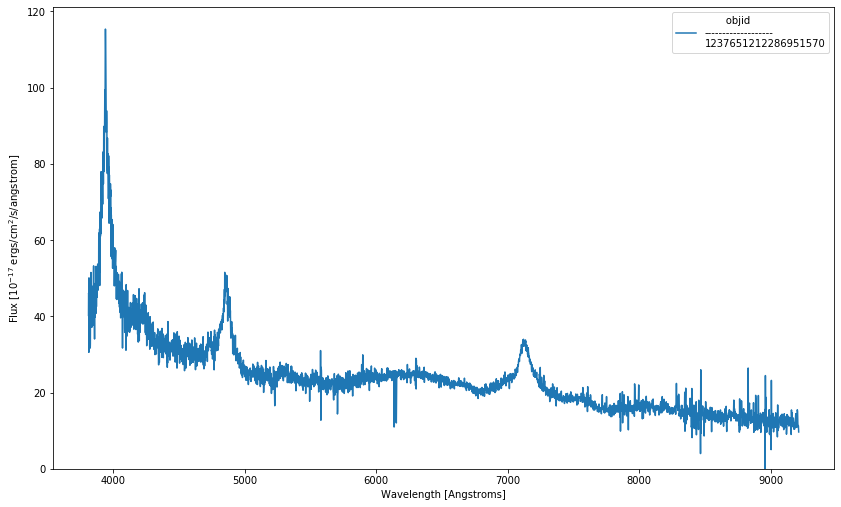

In [28]:
#Plot spectra
file = 'F:/quasar_database/catalogues'
with open(file,'rb') as rfile:
    sp = pickle.load(rfile)


fig, ax = plt.subplots(figsize=(14.,8.5))

ax.plot(10.**sp[0],sp[1],label=xid['objid'])
ax.set_ylabel('Flux [10$^{-17}$ ergs/cm$^2$/s/angstrom]')
ax.set_xlabel('Wavelength [Angstroms]')
ax.set_ylim(0)
ax.legend(loc='upper right')